# PRUEBA TECNICA ED MACHINA - Data Analyst

---



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src import clean_data, inconsistencies

### **Paneo General**

In [19]:
df = pd.read_csv('data/challenge_edMachina.csv', delimiter=';')

In [20]:
df.columns

Index(['particion', 'periodo', 'nota_final_materia', 'fecha_mesa_epoch',
       'nombre_examen', 'nota_parcial', 'assignment_id', 'ass_name',
       'ass_created_at', 'ass_due_at', 'ass_unlock_at', 'ass_lock_at',
       'points_possible', 'ass_name_sub', 'sub_uuid', 'score',
       'submission_type', 's_submitted_at', 's_graded_at', 's_created_at',
       'user_uuid', 'course_uuid', 'course_name', 'legajo'],
      dtype='object')

In [21]:
df.describe(include='all')

,particion,periodo,nota_final_materia,fecha_mesa_epoch,nombre_examen,nota_parcial,assignment_id,ass_name,ass_created_at,ass_due_at,...,sub_uuid,score,submission_type,s_submitted_at,s_graded_at,s_created_at,user_uuid,course_uuid,course_name,legajo
count,196124.000000,196124,196124.000000,7.010000e+03,7010,7010.000000,26061.000000,26061,2.606100e+04,2.606100e+04,...,24206,23876.000000,24206,2.420600e+04,2.387700e+04,2.420600e+04,196124,196124,196124,196124
unique,NaN,3,NaN,NaN,5,NaN,NaN,51,NaN,NaN,...,21938,NaN,7,NaN,NaN,NaN,600,582,561,601
top,NaN,1-2022,NaN,NaN,SEGUNDO PARCIAL(20),NaN,NaN,Actividad Práctica Integradora 4 [API4],NaN,NaN,...,02736ae3-000d-488b-8afa-38e7a92862ee,NaN,external_tool,NaN,NaN,NaN,518e8c5f-6632-450b-bcee-518807ff2e9f,2b274b15-83bb-4629-941e-fdc573af4e0b,Intuitive non-volatile ability,624097JCN
freq,NaN,187854,NaN,NaN,3213,NaN,NaN,3272,NaN,NaN,...,16,NaN,10191,NaN,NaN,NaN,1017,11439,11439,1017
mean,30.663891,NaN,7.546700,1.653584e+09,NaN,7.171469,204405.744983,NaN,1.648083e+09,1.654467e+09,...,NaN,84.159968,NaN,1.653061e+09,1.653225e+09,1.659396e+09,NaN,NaN,NaN,NaN
std,17.625074,NaN,1.732275,3.308269e+06,NaN,1.823261,6486.514305,NaN,2.479788e+06,3.330116e+06,...,NaN,18.254782,NaN,3.633599e+06,3.614172e+06,1.141774e+05,NaN,NaN,NaN,NaN
min,0.000000,NaN,0.000000,1.643587e+09,NaN,0.000000,191573.000000,NaN,1.643061e+09,1.644462e+09,...,NaN,0.000000,NaN,1.643389e+09,1.643389e+09,1.659393e+09,NaN,NaN,NaN,NaN
25%,15.000000,NaN,7.000000,1.651190e+09,NaN,6.000000,197229.000000,NaN,1.645736e+09,1.652670e+09,...,NaN,75.000000,NaN,1.650064e+09,1.650249e+09,1.659393e+09,NaN,NaN,NaN,NaN
50%,31.000000,NaN,8.000000,1.654214e+09,NaN,7.000000,206604.000000,NaN,1.647791e+09,1.654484e+09,...,NaN,88.333333,NaN,1.653344e+09,1.653424e+09,1.659393e+09,NaN,NaN,NaN,NaN
75%,46.000000,NaN,9.000000,1.656547e+09,NaN,9.000000,209619.000000,NaN,1.650459e+09,1.658113e+09,...,NaN,100.000000,NaN,1.656370e+09,1.656588e+09,1.659393e+09,NaN,NaN,NaN,NaN


**Observaciones sobre el dataset:**

- Se puede renombrar las columnas a un solo idioma en particular, por ejemplo "score" : "nota_entrega". No lo hago porque el diccionario de datos está de esa manera pero en un caso real si aplicaría.
- Se podría dividir en distintas tablas, por ejemplo "Tareas" y ahi poner la informacion de assignment, y traerlas hacia una tabla que se llame "RendimientoAlumnos" mediante un ID.

In [22]:
# Descripción general de las columnas y tipos de datos
df.info()

# Visualización de datos faltantes
missing_data = df.isnull().sum()
missing_data[missing_data > 0].sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196124 entries, 0 to 196123
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   particion           196124 non-null  int64  
 1   periodo             196124 non-null  object 
 2   nota_final_materia  196124 non-null  float64
 3   fecha_mesa_epoch    7010 non-null    float64
 4   nombre_examen       7010 non-null    object 
 5   nota_parcial        7010 non-null    float64
 6   assignment_id       26061 non-null   float64
 7   ass_name            26061 non-null   object 
 8   ass_created_at      26061 non-null   float64
 9   ass_due_at          26061 non-null   float64
 10  ass_unlock_at       24760 non-null   float64
 11  ass_lock_at         25979 non-null   float64
 12  points_possible     26061 non-null   float64
 13  ass_name_sub        24206 non-null   object 
 14  sub_uuid            24206 non-null   object 
 15  score               23876 non-null

fecha_mesa_epoch    189114
nota_parcial        189114
nombre_examen       189114
score               172248
s_graded_at         172247
ass_name_sub        171918
s_submitted_at      171918
submission_type     171918
sub_uuid            171918
s_created_at        171918
ass_unlock_at       171364
ass_lock_at         170145
points_possible     170063
ass_due_at          170063
ass_created_at      170063
ass_name            170063
assignment_id       170063
dtype: int64

In [23]:
# Crear un diccionario para almacenar los value_counts de cada columna
value_counts_dict = {}

# Iterar sobre cada columna y obtener el value_counts
for column in df.columns.drop('particion'):
    value_counts_dict[column] = df[column].value_counts()

# Mostrar los value_counts de cada columna
for column, value_counts in value_counts_dict.items():
    print(f'Value counts para la columna {column}:\n{value_counts}\n')

Value counts para la columna periodo:
periodo
1-2022     187854
01-2022      7730
2-2022        540
Name: count, dtype: int64

Value counts para la columna nota_final_materia:
nota_final_materia
8.0     46956
7.0     39423
9.0     38849
6.0     25104
10.0    23644
5.0     11592
4.0      4519
3.0      4301
2.0      1418
0.0       318
Name: count, dtype: int64

Value counts para la columna fecha_mesa_epoch:
fecha_mesa_epoch
1.655338e+09    202
1.652400e+09    187
1.657238e+09    182
1.649808e+09    181
1.651795e+09    165
               ... 
1.643674e+09      1
1.646266e+09      1
1.653264e+09      1
1.643587e+09      1
1.644797e+09      1
Name: count, Length: 125, dtype: int64

Value counts para la columna nombre_examen:
nombre_examen
SEGUNDO PARCIAL(20)                  3213
PRIMER PARCIAL(20)                   3067
INTEGRADOR(30)                        356
RECUPERATORIO PRIMER PARCIAL(20)      242
RECUPERATORIO SEGUNDO PARCIAL(20)     132
Name: count, dtype: int64

Value counts para l

In [24]:
num_alumnos = df['user_uuid'].nunique()
num_cursos = df['course_uuid'].nunique()

print(f'Número alumnos totales: {num_alumnos}\nNúmero cursos totales: {num_cursos}')


Número alumnos totales: 600
Número cursos totales: 582


* Key Points
  * Particiones:
    * Analizar dia 57 y 55 (picos anómalos).
  * Periodos:
    * Mismos periodos con distinto nombre.
  * Fecha mesa de examen:
    * Limpiar formato de fecha epoch.
  * Entregas:
    * Limpiar formato de fecha epoch.
    * Más id de entregas distintas que nombres de entregas distintas.
  * Cursos:
    * Más id de cursos distintos que nombres de cursos distintos.
  * Usuarios:
    * Más legajos distintos que id de usuarios distintos.
  * Tareas:
    * Más id de tareas distintas que nombres de tareas distintas.

### **Limpieza**

In [25]:
clean_data.unify_values(df)
clean_data.from_epoch_to_datetime(df)
inconsistencies.clean_course_inconsistencies(df)
inconsistencies.clean_assignment_inconsistencies(df)
inconsistencies.clean_submit_inconsistencies(df)
inconsistencies.clean_user_inconsistencies(df)

,particion,periodo,nota_final_materia,fecha_mesa,nombre_examen,nota_parcial,assignment_id,ass_name,ass_created_at,ass_due_at,...,sub_uuid,score,submission_type,s_submitted_at,s_graded_at,s_created_at,user_uuid,course_uuid,course_name,legajo
0,0,1-2022,9.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaT,NaT,NaT,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF
1,1,1-2022,9.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaT,NaT,NaT,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF
2,2,1-2022,9.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaT,NaT,NaT,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF
3,3,1-2022,9.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaT,NaT,NaT,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF
4,4,1-2022,9.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaT,NaT,NaT,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196119,55,1-2022,10.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaT,NaT,NaT,1f043fbc-2e51-4639-b99a-00e96f86968d,d9cc0ef0-3282-4c10-b2c7-bc231a26ca6a,Customizable hybrid forecast,398800TRX
196120,56,1-2022,10.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaT,NaT,NaT,1f043fbc-2e51-4639-b99a-00e96f86968d,d9cc0ef0-3282-4c10-b2c7-bc231a26ca6a,Customizable hybrid forecast,398800TRX
196121,57,1-2022,10.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaT,NaT,NaT,1f043fbc-2e51-4639-b99a-00e96f86968d,d9cc0ef0-3282-4c10-b2c7-bc231a26ca6a,Customizable hybrid forecast,398800TRX
196122,58,1-2022,10.0,NaT,NaN,NaN,NaN,NaN,NaT,NaT,...,NaN,NaN,NaN,NaT,NaT,NaT,1f043fbc-2e51-4639-b99a-00e96f86968d,d9cc0ef0-3282-4c10-b2c7-bc231a26ca6a,Customizable hybrid forecast,398800TRX


### **Feature engineering**

* **Sugerir posibles caracateristicas**
  * aprobados/desaprobados: bool (>= 5 == aprobado)
  * course_category: non-binary categorical (agrupar todos los cursos en distintas categorias para hacer más sencilla la visualización)

* **Sugerencias en cuanto a los datos**
  * Podrían agregarse datos acerca de los alumnos, como horas de sueño, alimentacion, tiempo de estudio total de x materia, si van o no al gimnasio, entre otras cosas. Creo que este enfoque es interesante ya que se puede evaluar el rendimiento del examen final desde una perspectiva más personal y en consecuencia, más precisa.

### **Distribuciones**

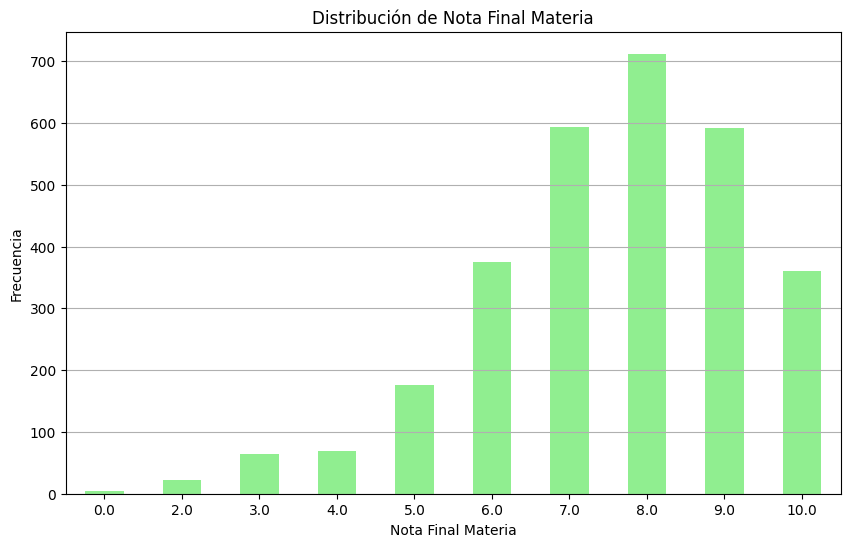

In [26]:
df_unico = df.drop_duplicates(subset=['course_uuid', 'user_uuid', 'nota_final_materia'])

# Calcular la frecuencia de cada valor en la columna nota_final_materia
nota_final_counts = df_unico['nota_final_materia'].value_counts().sort_index()

# Crear un gráfico de barras para visualizar la distribución de nota_final_materia
plt.figure(figsize=(10, 6))
nota_final_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribución de Nota Final Materia')
plt.xlabel('Nota Final Materia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

c:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


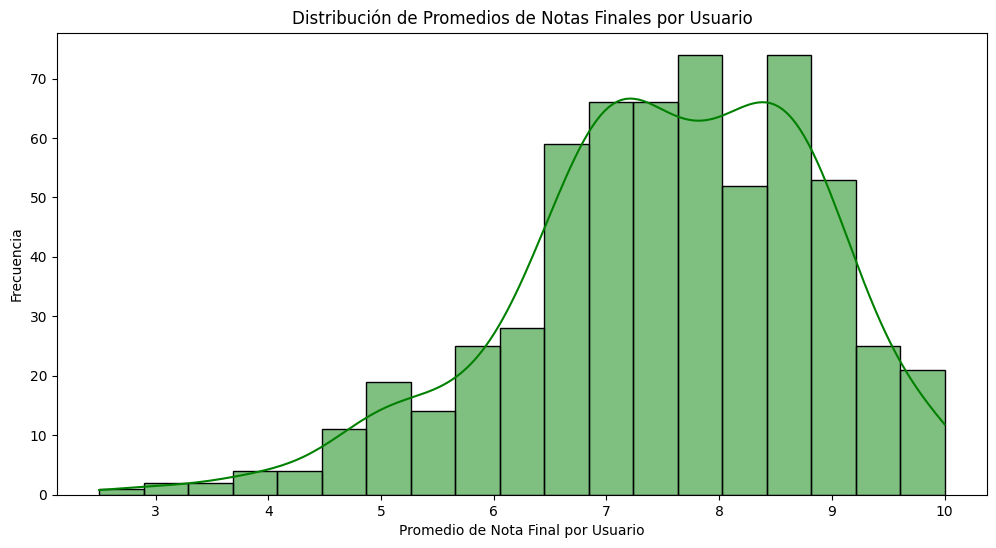

In [27]:
# Calcular el promedio de notas por usuario
user_summary = df_unico.groupby('user_uuid')['nota_final_materia'].mean().reset_index()

# Crear un histograma para visualizar la distribución de promedios de notas finales por usuario
plt.figure(figsize=(12, 6))
sns.histplot(user_summary['nota_final_materia'], kde=True, color='green')
plt.title('Distribución de Promedios de Notas Finales por Usuario')
plt.xlabel('Promedio de Nota Final por Usuario')
plt.ylabel('Frecuencia')
plt.show()

c:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


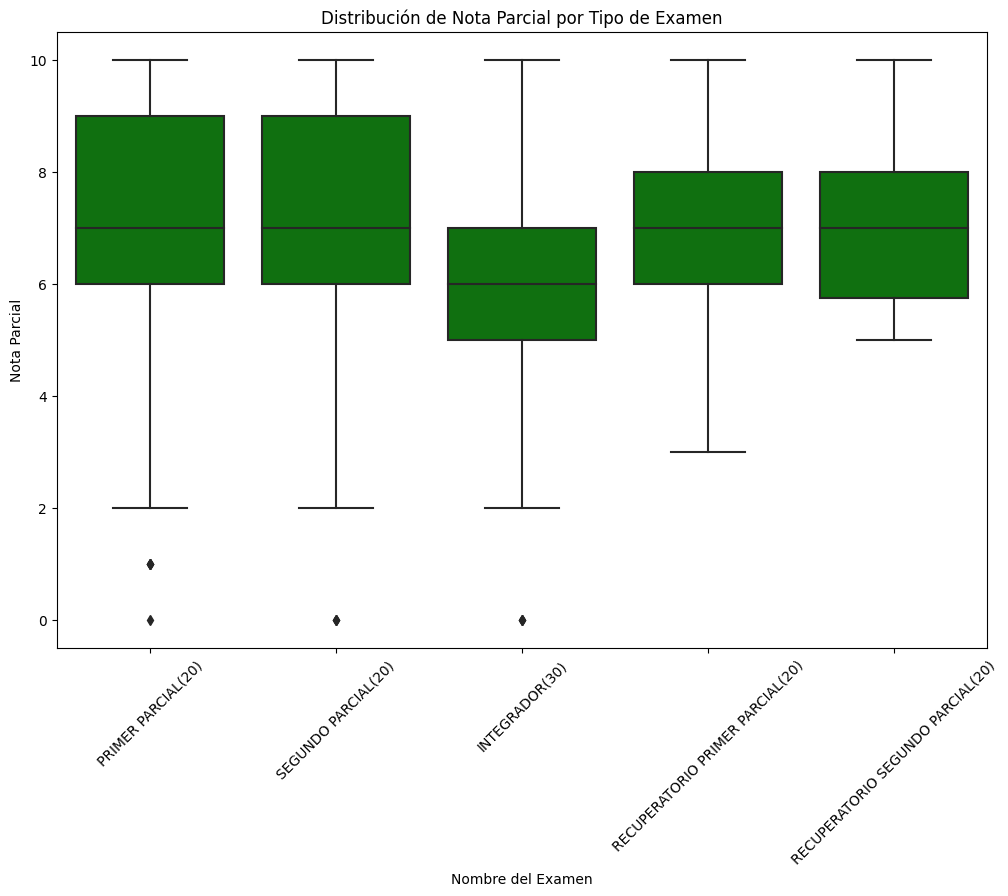

In [28]:
# Visualización con boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='nombre_examen', y='nota_parcial', data=df, color='green')
plt.title('Distribución de Nota Parcial por Tipo de Examen')
plt.xlabel('Nombre del Examen')
plt.ylabel('Nota Parcial')
plt.xticks(rotation=45)
plt.show()


c:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


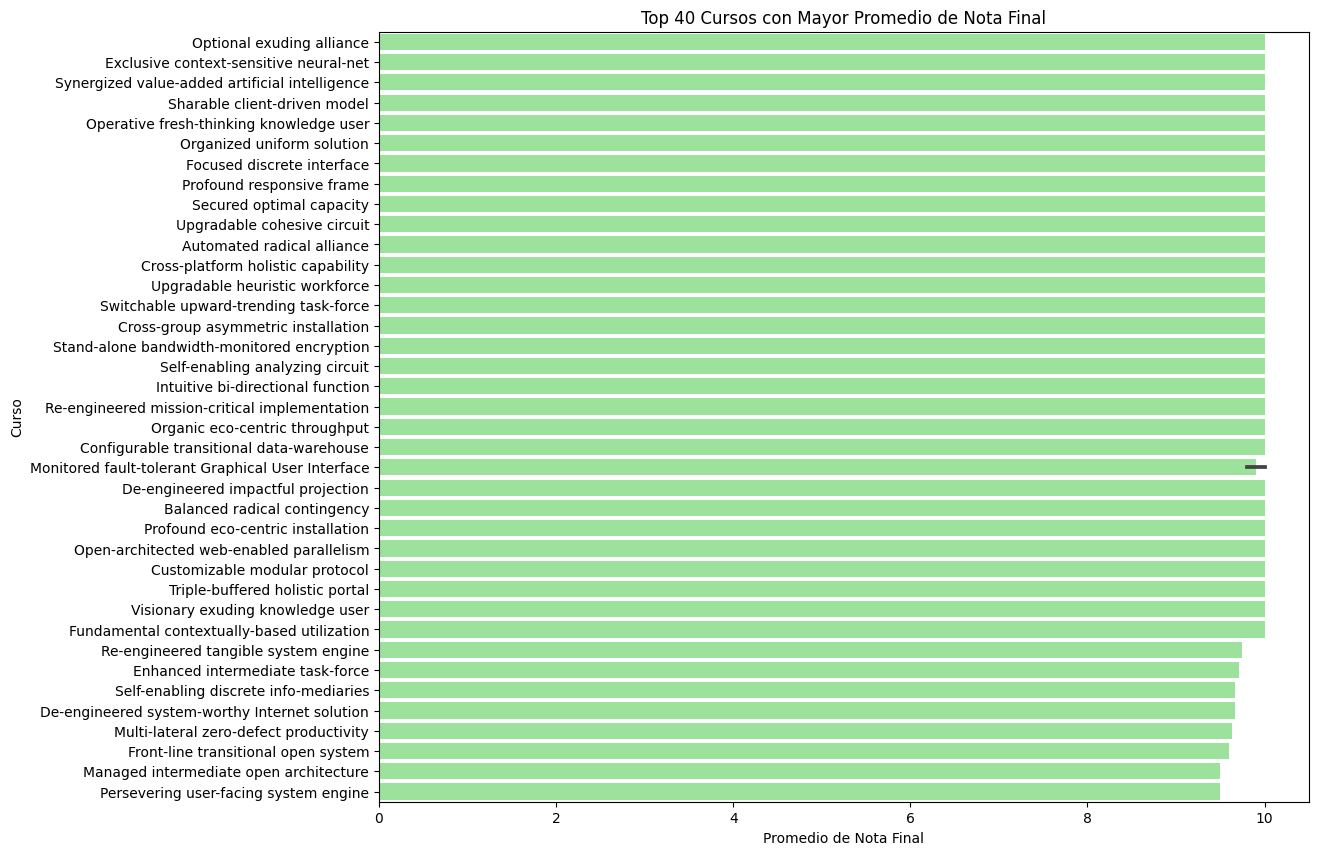

,nota_final_materia,course_name
0,7.690909,Stand-alone upward-trending secured line
1,6.000000,Implemented incremental infrastructure
2,7.000000,Versatile user-facing implementation
3,10.000000,Open-architected web-enabled parallelism
4,6.800000,Enhanced bandwidth-monitored core
...,...,...
577,8.333333,Realigned zero tolerance synergy
578,9.000000,Streamlined eco-centric secured line
579,9.500000,Business-focused bandwidth-monitored matrices
580,7.500000,Optional exuding alliance


In [29]:
# Agrupar nuevamente por course_name para obtener el promedio final por curso
course_summary = df_unico.groupby('course_uuid')['nota_final_materia'].mean().reset_index()

# Unir con el nombre del curso
course_summary = course_summary.merge(df[['course_uuid', 'course_name']].drop_duplicates(), on='course_uuid')

# Ordenar por promedio de nota final y seleccionar los 40 cursos con mayor promedio
top_courses = course_summary.sort_values(by='nota_final_materia', ascending=False).head(40)

# Generar el gráfico de barras horizontal sin barras de error
plt.figure(figsize=(12, 10))
sns.barplot(y='course_name', x='nota_final_materia', data=top_courses, orient='h', color='lightgreen')
plt.title('Top 40 Cursos con Mayor Promedio de Nota Final')
plt.xlabel('Promedio de Nota Final')
plt.ylabel('Curso')
plt.show()

course_summary[['nota_final_materia', 'course_name']]

c:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Felipe\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


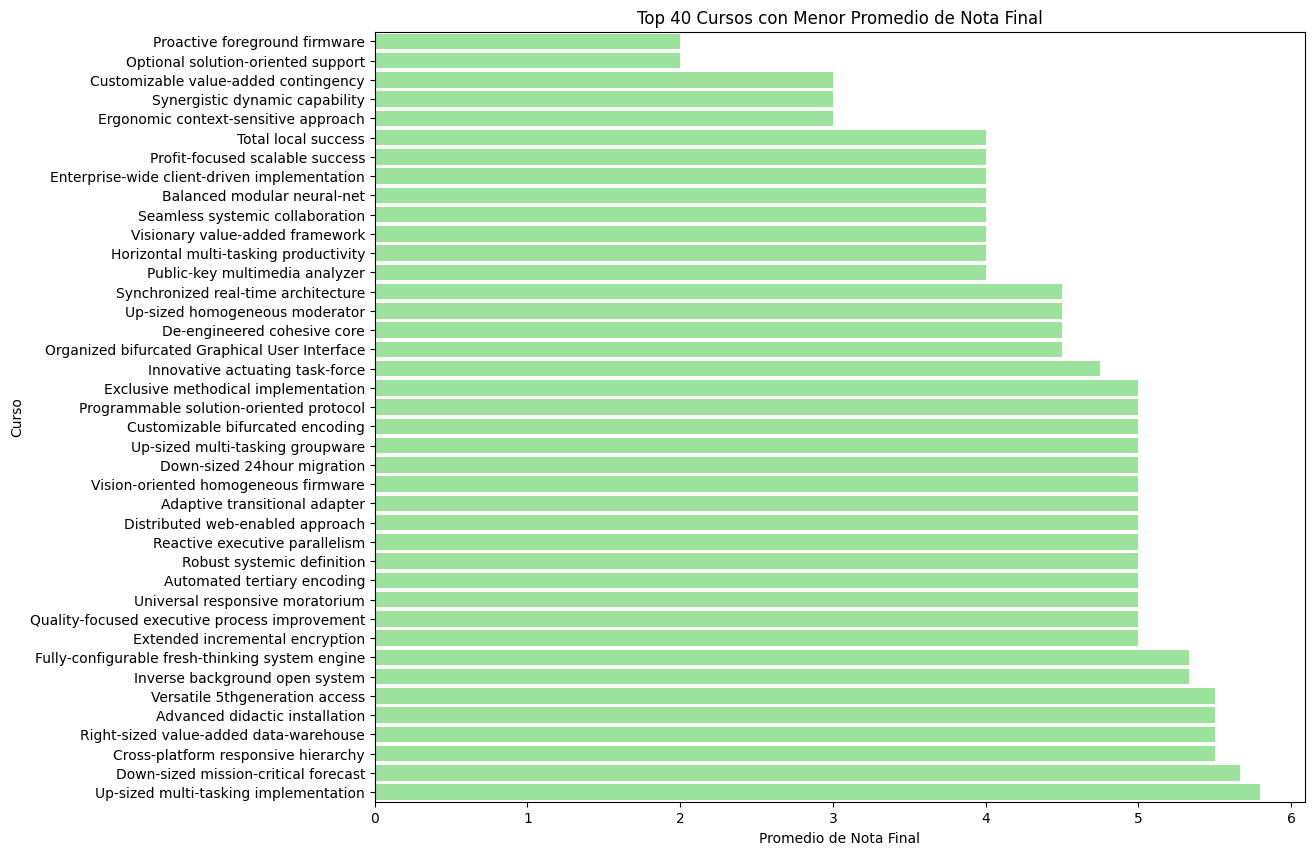

,nota_final_materia,course_name
0,7.690909,Stand-alone upward-trending secured line
1,6.000000,Implemented incremental infrastructure
2,7.000000,Versatile user-facing implementation
3,10.000000,Open-architected web-enabled parallelism
4,6.800000,Enhanced bandwidth-monitored core
...,...,...
577,8.333333,Realigned zero tolerance synergy
578,9.000000,Streamlined eco-centric secured line
579,9.500000,Business-focused bandwidth-monitored matrices
580,7.500000,Optional exuding alliance


In [30]:
# Agrupar nuevamente por course_name para obtener el promedio final por curso
course_summary = df_unico.groupby('course_uuid')['nota_final_materia'].mean().reset_index()

# Unir con el nombre del curso
course_summary = course_summary.merge(df[['course_uuid', 'course_name']].drop_duplicates(), on='course_uuid')

# Ordenar por promedio de nota final y seleccionar los 40 cursos con mayor promedio
top_courses = course_summary.sort_values(by='nota_final_materia', ascending=True).head(40)

# Generar el gráfico de barras horizontal sin barras de error
plt.figure(figsize=(12, 10))
sns.barplot(y='course_name', x='nota_final_materia', data=top_courses, orient='h', color='lightgreen')
plt.title('Top 40 Cursos con Menor Promedio de Nota Final')
plt.xlabel('Promedio de Nota Final')
plt.ylabel('Curso')
plt.show()

course_summary[['nota_final_materia', 'course_name']]

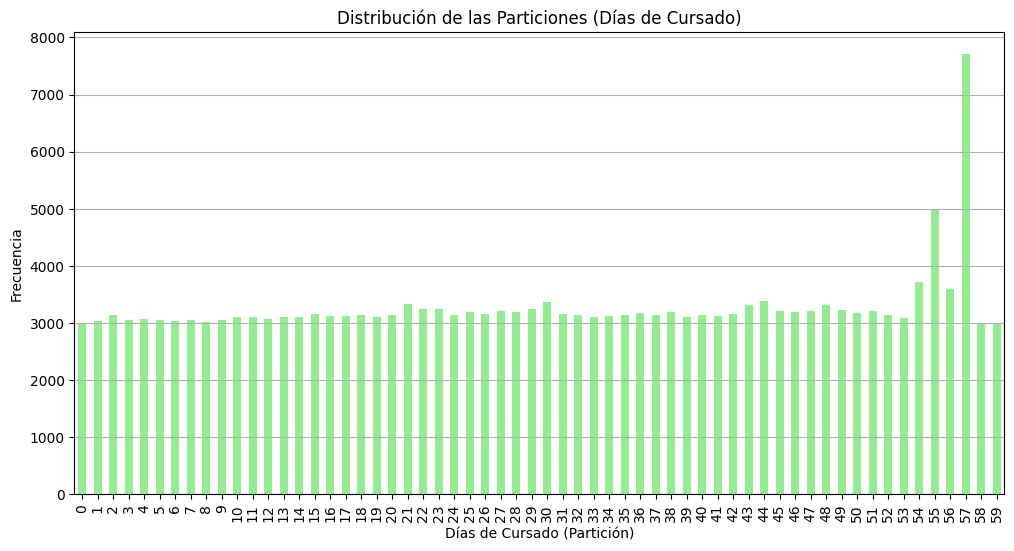

In [31]:
# Calcular la frecuencia de cada partición
particion_counts = df['particion'].value_counts().sort_index()

# Crear un gráfico de barras para visualizar la distribución de las particiones
plt.figure(figsize=(12, 6))
particion_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribución de las Particiones (Días de Cursado)')
plt.xlabel('Días de Cursado (Partición)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

pico de actividades  en el dia 57 de cursado

### **Análisis**

Correlación entre nota parcial y nota final: 0.7303213481689923


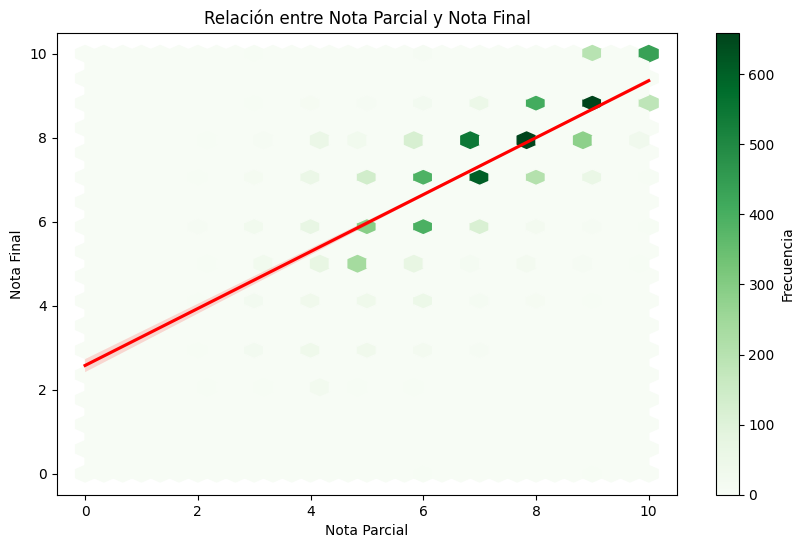

In [32]:
correlation = df['nota_parcial'].corr(df['nota_final_materia'])
print(f'Correlación entre nota parcial y nota final: {correlation}')

plt.figure(figsize=(10, 6))
plt.hexbin(df['nota_parcial'], df['nota_final_materia'], gridsize=30, cmap='Greens')
sns.regplot(x='nota_parcial', y='nota_final_materia', data=df, scatter=False, color='red')
plt.colorbar(label='Frecuencia')
plt.title('Relación entre Nota Parcial y Nota Final')
plt.xlabel('Nota Parcial')
plt.ylabel('Nota Final')
plt.show()


Correlación entre nota de entrega y nota final: 0.18109416639647177


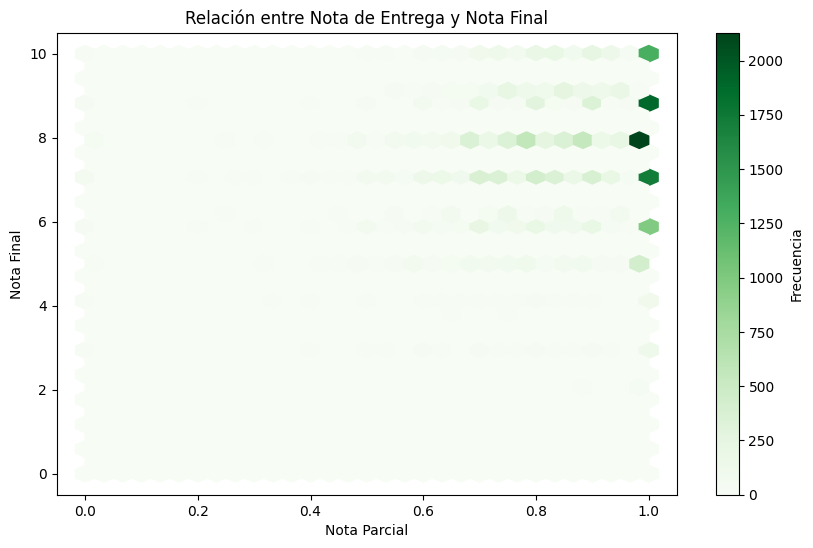

In [34]:
# Columna que queremos normalizar
df['score'] = df['score'] / 10.0
# Calcular la correlación entre la nota parcial y la nota final
correlation = df['score'].corr(df['nota_final_materia'])
print(f'Correlación entre nota de entrega y nota final: {correlation}')

plt.figure(figsize=(10, 6))
plt.hexbin(df['score'], df['nota_final_materia'], gridsize=30, cmap='Greens')
plt.colorbar(label='Frecuencia')
plt.title('Relación entre Nota de Entrega y Nota Final')
plt.xlabel('Nota Parcial')
plt.ylabel('Nota Final')
plt.show()
